## Lab 1: Data Visualization, Data Preprocessing, and Statistical Analysis
Anna Bottu

MSCS-634: Advanced Big Data and Data Mining

# Step 1: Data Collection

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv("index_1.csv")
df.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


# Step 2: Data Visualization

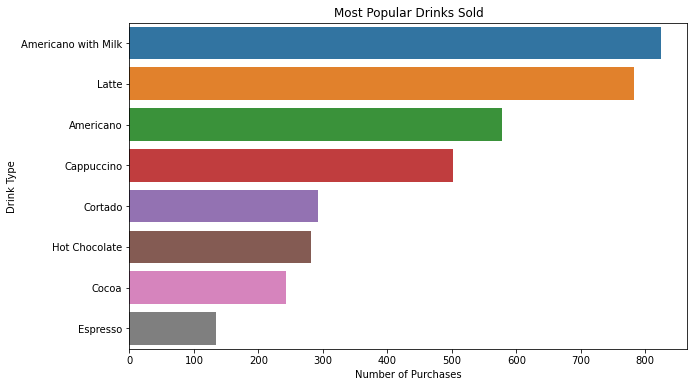

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(y='coffee_name', data=df, order=df['coffee_name'].value_counts().index)
plt.title('Most Popular Drinks Sold')
plt.xlabel('Number of Purchases')
plt.ylabel('Drink Type')
plt.show()


In [29]:
#first we need to convert to datatime
df['date'] = pd.to_datetime(df['date'])

In [30]:
#then we are going to create a new column for month name
df['Month'] = df['date'].dt.strftime('%B')


In [31]:
#order the months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

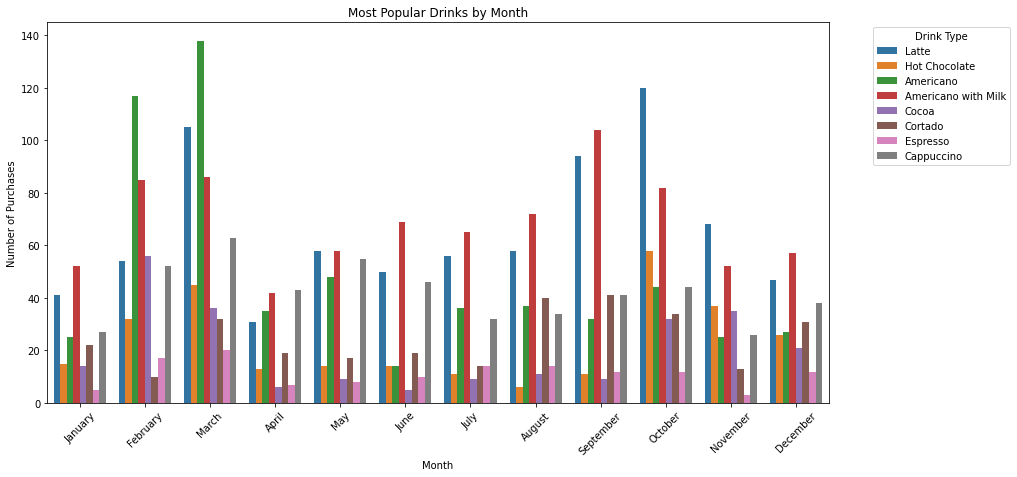

In [32]:
#creates a figure for the plot
plt.figure(figsize=(14, 7))
#using seaborn's countplot which counts how many times each coffee type appears
sns.countplot(data=df, x='Month', hue='coffee_name', order=month_order)
#title
plt.title('Most Popular Drinks by Month')
# x-axis label
plt.xlabel('Month')
#y-axis label
plt.ylabel('Number of Purchases')
#rotates the month names to it can fit
plt.xticks(rotation=45)
#puts the key outside of the figure
plt.legend(title='Drink Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Step 3: Data Preprocessing

Data Cleaning

There were 29 missing values in the card column

In [18]:
df.isnull().sum()

date           0
datetime       0
cash_type      0
card           0
money          0
coffee_name    0
dtype: int64

In [19]:
#fills empty places with N/A in the card column
df['card'] = df['card'].fillna('N/A')

Outlier Detection and Removal using IQR

In [33]:
#Calculate IQR for the money column
Q1 = df['money'].quantile(0.25)
Q3 = df['money'].quantile(0.75)
IQR = Q3 - Q1

print("Q1 (25%):", Q1)
print("Q3 (75%):", Q3)
print("IQR:", IQR)

Q1 (25%): 27.92
Q3 (75%): 35.76
IQR: 7.839999999999996


In [34]:
#Define upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)


Lower bound: 16.160000000000007
Upper bound: 47.519999999999996


In [35]:
#Identify outliers
outliers = df[(df['money'] < lower_bound) | (df['money'] > upper_bound)]
print("Identified outliers:")
print(outliers[['coffee_name', 'money']])


Identified outliers:
Empty DataFrame
Columns: [coffee_name, money]
Index: []


As seen above there are no outliers in the money column so there is no need to remove any rows. The dataset remains unchanged after this step

Data Reduction

In [36]:
#sampling by number of rows
df_sampled = df.sample(n=500, random_state=42)
print("Shape before sampling:", df.shape)
print("Shape after sampling:", df_sampled.shape)

Shape before sampling: (3636, 7)
Shape after sampling: (500, 7)


In [37]:
#dimension elimination by dropping less relvant columns
df_dimension_reduced = df_sampled.drop(columns=['cash_type', 'card'])
print("Columns before dropping:", df_sampled.columns.tolist())
print("Columns after dropping:", df_dimension_reduced.columns.tolist())

Columns before dropping: ['date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name', 'Month']
Columns after dropping: ['date', 'datetime', 'money', 'coffee_name', 'Month']


Data Scaling and Discretization

In [40]:
#create a copy
df_scaled = df.copy()

In [41]:
#calculate the min and max of the money column
min_value = df['money'].min()
max_value = df['money'].max()

In [42]:
#add the min-max scaling formula
df_scaled['money_minmax'] = (df['money'] - min_value) / (max_value - min_value)


In [43]:
#print the before and after scaling
print("Before scaling:")
print(df[['money']].head())

print("After Min-Max scaling:")
print(df_scaled[['money', 'money_minmax']].head())

Before scaling:
   money
0   38.7
1   38.7
2   38.7
3   28.9
4   38.7
After Min-Max scaling:
   money  money_minmax
0   38.7      0.940585
1   38.7      0.940585
2   38.7      0.940585
3   28.9      0.492687
4   38.7      0.940585


In [44]:
#create a copy
df_zScore = df.copy()

In [45]:
#mean and standard deviation of money column
mean = df['money'].mean()
standardDeviation = df['money'].std()

In [47]:
#Z-score formula
df_zScore['money_zscore'] = (df['money'] - mean) / standardDeviation

In [48]:
#print before and after
print("After Z-score standardization:")
print(df_zScore[['money', 'money_zscore']].head())

After Z-score standardization:
   money  money_zscore
0   38.7      1.413261
1   38.7      1.413261
2   38.7      1.413261
3   28.9     -0.578639
4   38.7      1.413261


# Step 4: Statistical Analysis

In [49]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3636 entries, 0 to 3635
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         3636 non-null   datetime64[ns]
 1   datetime     3636 non-null   datetime64[ns]
 2   cash_type    3636 non-null   object        
 3   card         3636 non-null   object        
 4   money        3636 non-null   float64       
 5   coffee_name  3636 non-null   object        
 6   Month        3636 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 199.0+ KB
None


In [50]:
print(df.describe())

             money
count  3636.000000
mean     31.746859
std       4.919926
min      18.120000
25%      27.920000
50%      32.820000
75%      35.760000
max      40.000000


In [51]:
#minimum value
min_value = df['money'].min()
print("Minimum:", min_value)

#maximum value
max_value = df['money'].max()
print("Maximum:", max_value)

#mean value
mean_value = df['money'].mean()
print("Mean:", mean_value)

#median value
median_value = df['money'].median()
print("Median:", median_value)

#mode value
mode_value = df['money'].mode()[0]  
print("Mode:", mode_value)

Minimum: 18.12
Maximum: 40.0
Mean: 31.746859185917987
Median: 32.82
Mode: 35.76


In [52]:
#gets the range (max - min)
range_value = df['money'].max() - df['money'].min()
print("Range:", range_value)

#gets the quartiles
Q1 = df['money'].quantile(0.25)
Q2 = df['money'].quantile(0.50) 
Q3 = df['money'].quantile(0.75)

print("Q1:", Q1)
print("Q2:", Q2)
print("Q3:", Q3)

# gets the interquartile Range (IQR)
IQR = Q3 - Q1
print("Interquartile Range (IQR):", IQR)

#gets the variance
variance = df['money'].var()
print("Variance:", variance)

#gets standard deviation
std_dev = df['money'].std()
print("Standard Deviation:", std_dev)


Range: 21.88
Q1: 27.92
Q2: 32.82
Q3: 35.76
Interquartile Range (IQR): 7.839999999999996
Variance: 24.205669912489583
Standard Deviation: 4.919925803555333


In [54]:
#correlation analysis
correlation = df.corr()
#print
print(correlation)

       money
money    1.0
